#### Importando bibliotecas

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import emoji

import math
import os.path
import json
import functools
import operator
import re

from statistics import mean, stdev
from scipy.stats import uniform, expon, norm, probplot, percentileofscore # Tirar os imports na versão estudante

#### Lendo os arquivos CSV

In [4]:
steam = pd.read_csv(r"C:\Users\biamc\Documents\CDados\CDADOS_PROJETO_3\steam-store-games\steam.csv", index_col=0)
steam_description = pd.read_csv(r"C:\Users\biamc\Documents\CDados\CDADOS_PROJETO_3\steam-store-games\steam_description_data.csv", index_col=0)
steam_media = pd.read_csv(r"C:\Users\biamc\Documents\CDados\CDADOS_PROJETO_3\steam-store-games\steam_media_data.csv", index_col=0)
steamspy = pd.read_csv(r"C:\Users\biamc\Documents\CDados\CDADOS_PROJETO_3\steam-store-games\steamspy_tag_data.csv", index_col=0)
steam.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [5]:
genres = steam['genres']
genres.value_counts()

Action;Indie                                                                 1852
Casual;Indie                                                                 1482
Action;Adventure;Indie                                                       1229
Adventure;Indie                                                              1170
Action;Casual;Indie                                                          1004
Action                                                                        843
Adventure;Casual;Indie                                                        801
Indie                                                                         759
Casual                                                                        560
Adventure                                                                     535
Adventure;Casual                                                              506
Strategy                                                                      485
Action;Adventure

In [60]:
#lista com todos os gêneros que aparecem
genresl = []
for i in genres:
    genresl.append(i)
    
genresl2 = []

for i in genresl:
    if ";" in i:
        genresl2.extend(i.split(";"))
    else:
        genresl2.append(i)


print(genresl2)

['Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Free to Play', 'Action', 'Action', 'Action', 'Free to Play', 'Strategy', 'Action', 'Adventure', 'Action', 'Action', 'Free to Play', 'Indie', 'Action', 'Action', 'Action', 'Indie', 'Strategy', 'Indie', 'Strategy', 'Indie', 'Strategy', 'Indie', 'Strategy', 'Strategy', 'Strategy', 'Strategy', 'Strategy', 'Strategy', 'RPG', 'Animation & Modeling', 'Video Production', 'Strategy', 'RPG', 'Action', 'RPG', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Indie', 'RPG', 'Action', 'Action', 'Casual', 'Indie', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Indie', 'Strategy', 'Action', 'Strategy', 'Strategy', 'Action', 'Simulation', 'Strategy', 'Simulation', 'Strat

In [59]:
#lista dos gêneros dos jogos
generos = steam.genres.str.cat(sep=";")
generos = generos.split(";")
lista_generos = []
for i in generos:
    if i not in lista_generos:
        lista_generos.append(i)
lista_software = ["Animation & Modeling", "Web Publishing", "Design & Illustration", "Early Access", "Utilities", "Video Production", "Nudity", "Photo Editing", "Accounting", "Game Development", "Free to Play", "Audio Production", "Tutorial", "Sexual Content", "Education", "Software Training", "Documentary"]
for i in lista_software:
    if i in lista_generos:
        lista_generos.remove(i)
lista_generos

['Action',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Sports',
 'Gore']

In [64]:
#quantidade de jogos em cada genêro
genres_dict = {}

for i in genresl2:
    if i in lista_generos:
        if i not in genres_dict:
            genres_dict[i] = 1
        else:
            genres_dict[i] +=1
        
print(genres_dict)

{'Action': 11903, 'Strategy': 5247, 'Adventure': 10032, 'Indie': 19421, 'RPG': 4311, 'Casual': 10210, 'Simulation': 5194, 'Racing': 1024, 'Violent': 843, 'Massively Multiplayer': 723, 'Sports': 1322, 'Gore': 537}


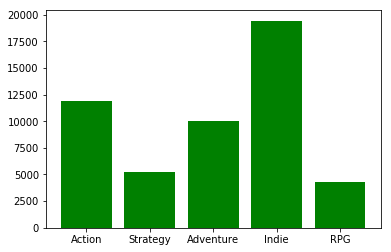

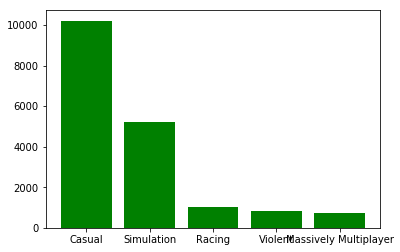

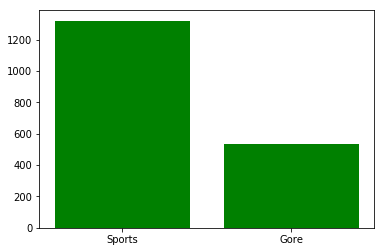

In [65]:
#histogramas número de jogos por tag
n1 = 0

tab1 = {}
tab2 = {}
tab3= {}


for i in genres_dict:
#     print(i)
    if n1<=4:
        if i not in tab1.keys():
            tab1[i] = genres_dict[i]
            n1+=1
    elif n1<=9:
        if i not in tab2.keys():
            tab2[i] = genres_dict[i]
            n1+=1
    elif n1<=14:
        if i not in tab3.keys():
            tab3[i] = genres_dict[i]
            n1+=1

plt1 = plt.bar(tab1.keys(), tab1.values(), color='g')
plt.show()
plt2 = plt.bar(tab2.keys(), tab2.values(), color='g')
plt.show()
plt3 = plt.bar(tab3.keys(), tab3.values(), color='g')
plt.show()

In [37]:
#correlação entre tempo médio de jogo e preço
steam['average_playtime'].corr(steam['price'])

0.04924234765629883

tempo médio de jogo e preço não possuem uma alta correlação

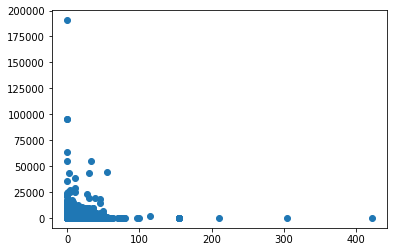

In [43]:
plt.scatter(steam['price'], steam['average_playtime'])

In [38]:
#correlação entre mediana do tempo de jogo e preço
steam['median_playtime'].corr(steam['price'])

0.03661017775404031

mediana do tempo de jogo e preço não possuem alta correlação

In [66]:
s_corr = steam.genres.str.get_dummies(sep=';').corrwith(steam.price/steam.price.max())
print (s_corr)

Accounting              -0.005990
Action                   0.006993
Adventure                0.004249
Animation & Modeling     0.148716
Audio Production         0.021520
Casual                  -0.194844
Design & Illustration    0.149529
Documentary             -0.001619
Early Access             0.042726
Education                0.114252
Free to Play            -0.196770
Game Development         0.176981
Gore                    -0.001916
Indie                   -0.208010
Massively Multiplayer   -0.036980
Nudity                   0.015277
Photo Editing            0.022903
RPG                      0.047744
Racing                   0.024470
Sexual Content           0.009325
Simulation               0.069962
Software Training        0.110598
Sports                   0.051781
Strategy                 0.053940
Tutorial                -0.001619
Utilities                0.077743
Video Production         0.024966
Violent                  0.003418
Web Publishing           0.137357
dtype: float64